In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [2]:
df = pd.read_csv("Student_performance_data_.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df.shape

(2392, 15)

In [7]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [8]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [10]:
df = df.drop(["StudentID"],axis=1)

In [11]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [12]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [13]:
df["Age"].unique()

array([17, 18, 15, 16], dtype=int64)

In [14]:
df["Age"].value_counts()

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,1,1222
1,0,1170


In [16]:
df["ParentalEducation"].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [17]:
df["ParentalEducation"].value_counts()

ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64

In [18]:
df["ParentalSupport"].unique()

array([2, 1, 3, 4, 0], dtype=int64)

In [19]:
df["ParentalSupport"].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

In [20]:
df["Ethnicity"].unique()

array([0, 2, 1, 3], dtype=int64)

In [21]:
df["Ethnicity"].value_counts()

Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64

In [22]:
df["Extracurricular"].unique()

array([0, 1], dtype=int64)

In [23]:
df["Extracurricular"].value_counts()

Extracurricular
0    1475
1     917
Name: count, dtype: int64

In [24]:
df["Music"].unique()

array([1, 0], dtype=int64)

In [25]:
df["Music"].value_counts()

Music
0    1921
1     471
Name: count, dtype: int64

In [26]:
df["Sports"].unique()

array([0, 1], dtype=int64)

In [27]:
df["Sports"].value_counts()

Sports
0    1666
1     726
Name: count, dtype: int64

In [28]:
df["Tutoring"].unique()

array([1, 0], dtype=int64)

In [29]:
df["Tutoring"].value_counts()

Tutoring
0    1671
1     721
Name: count, dtype: int64

In [30]:
df["Volunteering"].unique()

array([0, 1], dtype=int64)

In [31]:
df["Volunteering"].value_counts()

Volunteering
0    2016
1     376
Name: count, dtype: int64

In [32]:
df["GPA"].min()

0.0

In [33]:
df["GPA"].max()

4.0

In [34]:
df["StudyTimeWeekly"].min()

0.001056538645936

In [35]:
df["StudyTimeWeekly"].max()

19.97809399526153

In [36]:
mean = df["StudyTimeWeekly"].mean()
print("Öğrenci Haftalık Çalışma Saati Ortalaması:",mean)

Öğrenci Haftalık Çalışma Saati Ortalaması: 9.771991919431738


In [37]:
group = df.groupby("Gender")[["Age"]].mean().reset_index()
group

,Gender,Age
0,0,16.417094
1,1,16.518003


In [38]:
group_gender_gpa = df.groupby("Gender")[["GPA"]].mean().reset_index()
group_gender_gpa

,Gender,GPA
0,0,1.918679
1,1,1.894225


In [39]:
df.groupby("GradeClass")[["StudyTimeWeekly"]].mean().reset_index()

,GradeClass,StudyTimeWeekly
0,0.0,11.854926
1,1.0,11.122335
2,2.0,10.106404
3,3.0,9.757963
4,4.0,9.184822


In [40]:
df.groupby("Sports")["GPA"].mean().reset_index()

,Sports,GPA
0,0,1.871240
1,1,1.986381


In [41]:
df.groupby("Music")["GPA"].mean().reset_index()

,Music,GPA
0,0,1.872969
1,1,2.041664


In [42]:
df.groupby("Extracurricular")["GPA"].mean().reset_index()

,Extracurricular,GPA
0,0,1.838316
1,1,2.015357


In [43]:
df.groupby("Absences")["GPA"].mean().reset_index()

,Absences,GPA
0,0,3.401790
1,1,3.254577
2,2,3.082517
3,3,3.092297
4,4,2.971374
5,5,2.801303
6,6,2.757924
7,7,2.618820
8,8,2.515815
9,9,2.526068


In [44]:
df.groupby("Volunteering")["GPA"].mean().reset_index()

,Volunteering,GPA
0,0,1.904899
1,1,1.913089


In [45]:
df["GPA"].mean()

1.9061863027265407

In [46]:
df.groupby(["ParentalSupport","ParentalEducation"])["GPA"].mean().reset_index()

,ParentalSupport,ParentalEducation,GPA
0,0,0,1.509600
1,0,1,1.651207
2,0,2,1.674877
3,0,3,1.222052
4,0,4,1.147971
5,1,0,1.682445
6,1,1,1.805624
7,1,2,1.766580
8,1,3,1.698426
9,1,4,1.714893


In [47]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'ParentalEducation'}>],
       [<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>,
        <Axes: title={'center': 'ParentalSupport'}>],
       [<Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>],
       [<Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >, <Axes: >]],
      dtype=object)

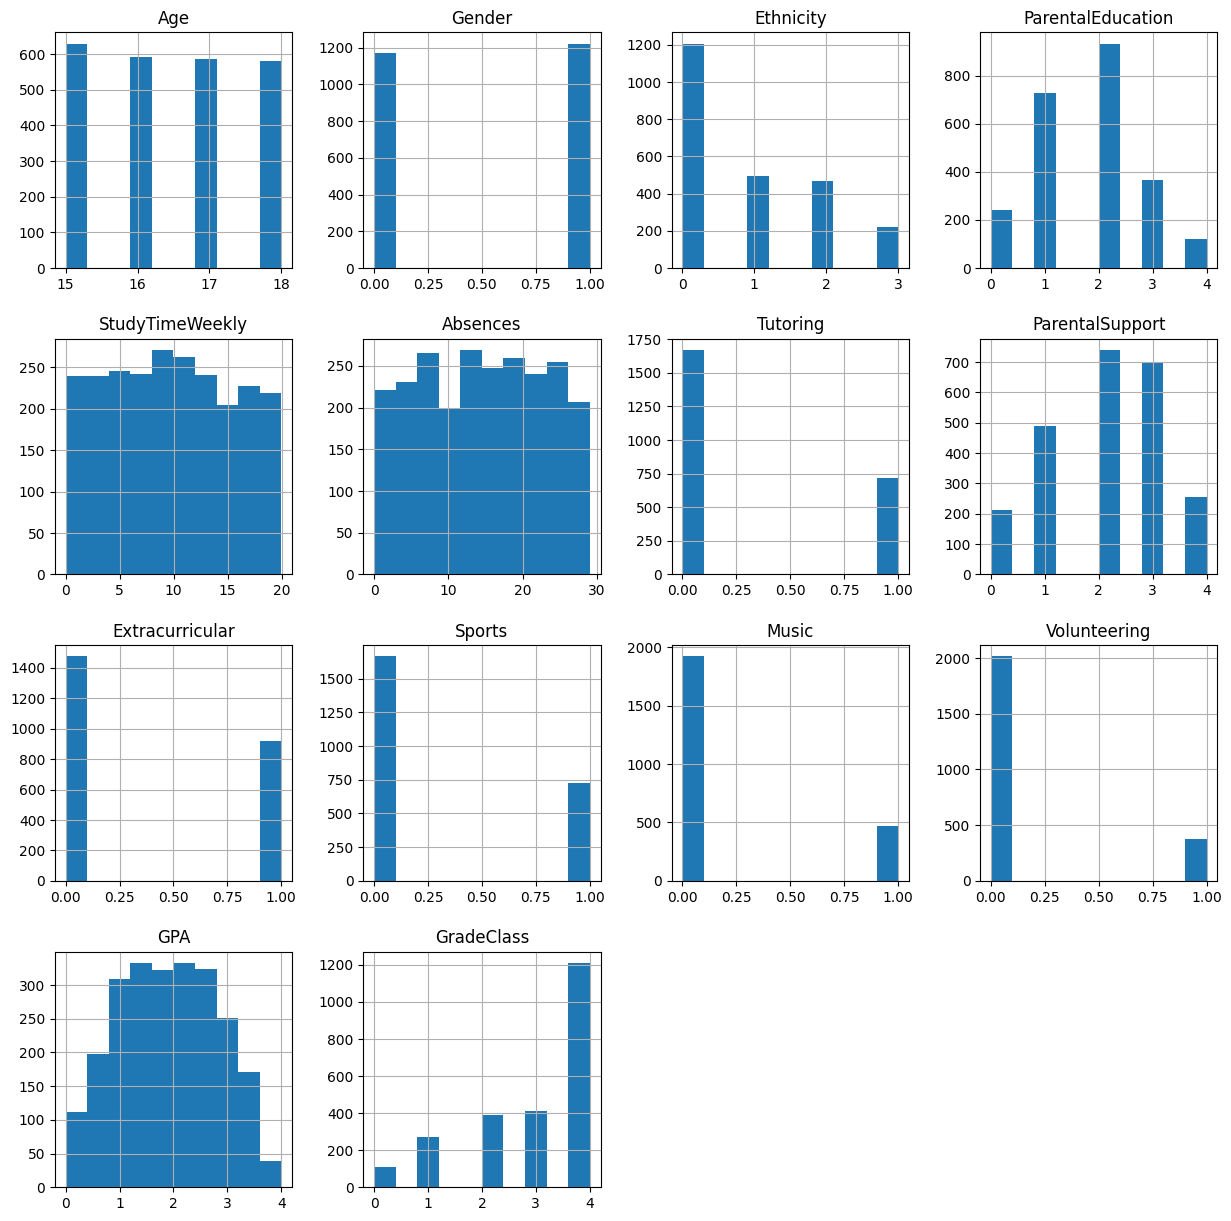

In [48]:
df.hist(figsize=(15,15))

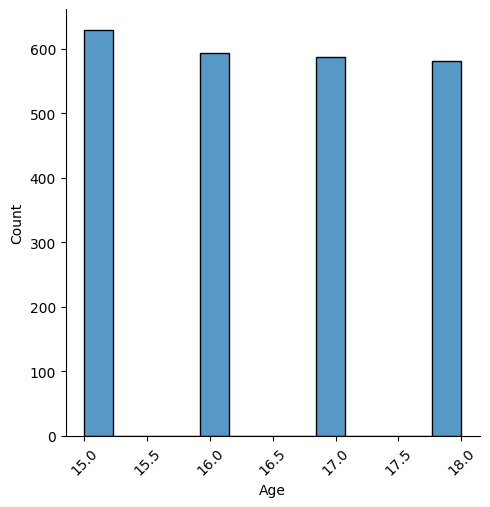

In [49]:
sns.displot(df["Age"])
plt.xticks(rotation = 45)
plt.show()

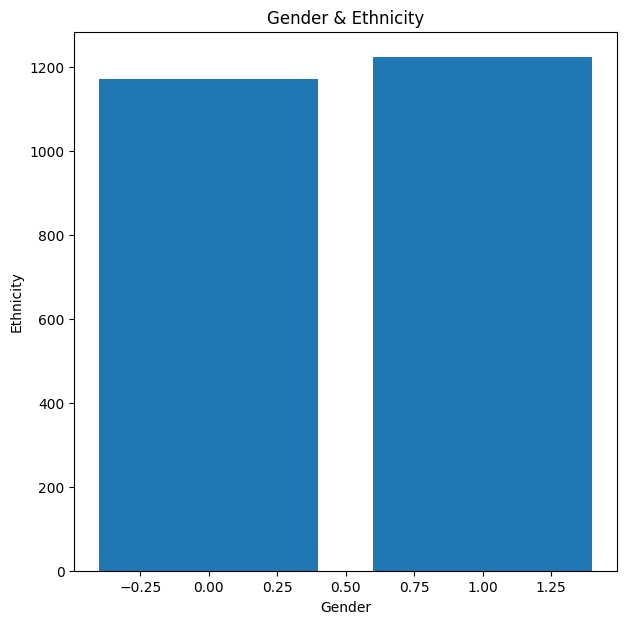

In [50]:
group = df.groupby("Gender")[["Ethnicity"]].count().reset_index()
plt.figure(figsize=(7,7))
plt.bar(x="Gender",height="Ethnicity",data=group)
plt.xlabel("Gender")
plt.ylabel("Ethnicity")
plt.title("Gender & Ethnicity")
plt.show()

C:\Users\faatm\AppData\Local\Temp\ipykernel_4188\2301198381.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


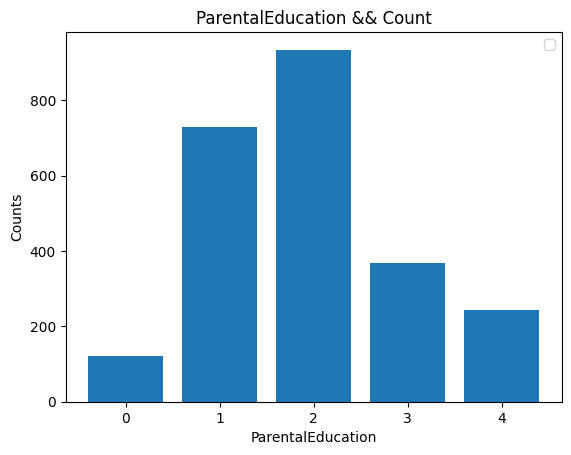

In [51]:
plt.bar(df['ParentalEducation'].unique(),df['ParentalEducation'].value_counts())
plt.title('ParentalEducation && Count')
plt.xlabel('ParentalEducation')
plt.ylabel('Counts')
plt.legend()
plt.show()

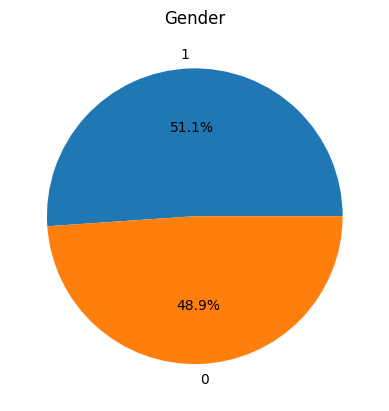

In [52]:
gender =df['Gender'].value_counts()
gender.plot(kind="pie",autopct='%1.1f%%')
plt.title("Gender")
plt.ylabel("")
plt.show()

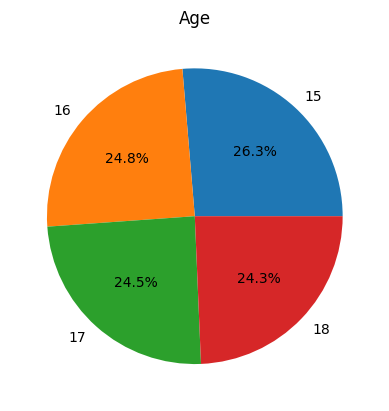

In [53]:
age = df["Age"].value_counts()
age.plot(kind="pie",autopct="%1.1f%%")
plt.title("Age")
plt.ylabel("")
plt.show()

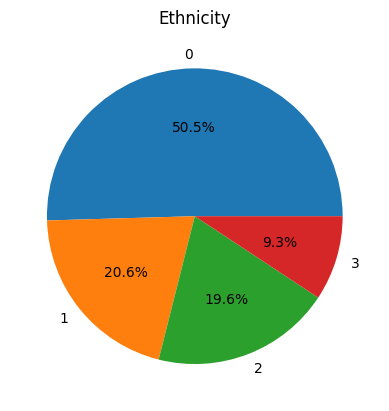

In [54]:
ethnicity = df["Ethnicity"].value_counts()
ethnicity.plot(kind="pie",autopct="%1.1f%%")
plt.title("Ethnicity")
plt.ylabel("")
plt.show()

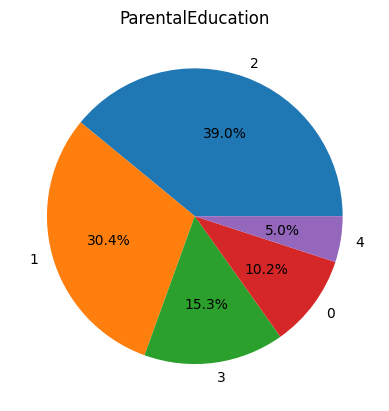

In [55]:
ethnicity = df["ParentalEducation"].value_counts()
ethnicity.plot(kind="pie",autopct="%1.1f%%")
plt.title("ParentalEducation")
plt.ylabel("")
plt.show()

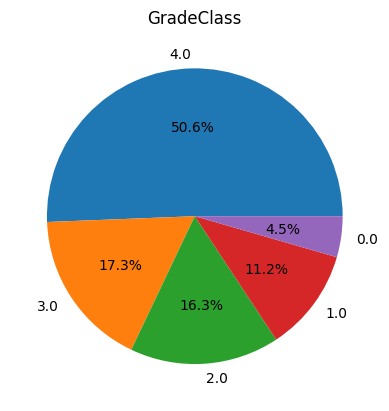

In [56]:
gradeclass = df["GradeClass"].value_counts()
gradeclass.plot(kind="pie",autopct="%1.1f%%")
plt.title("GradeClass")
plt.ylabel("")
plt.show()

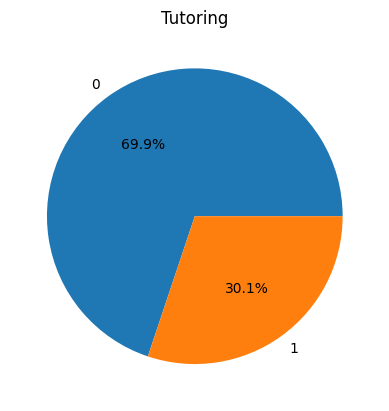

In [57]:
tutoring = df["Tutoring"].value_counts()
tutoring.plot(kind="pie",autopct="%1.1f%%")
plt.title("Tutoring")
plt.ylabel("")
plt.show()

Text(0.5, 1.0, 'Education & Count')

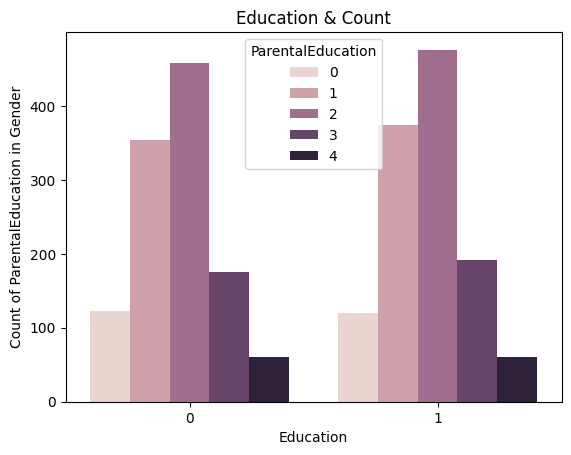

In [58]:
sns.countplot(x='Gender',hue='ParentalEducation',data=df)
plt.xlabel('Education')
plt.ylabel('Count of ParentalEducation in Gender')
plt.title('Education & Count')

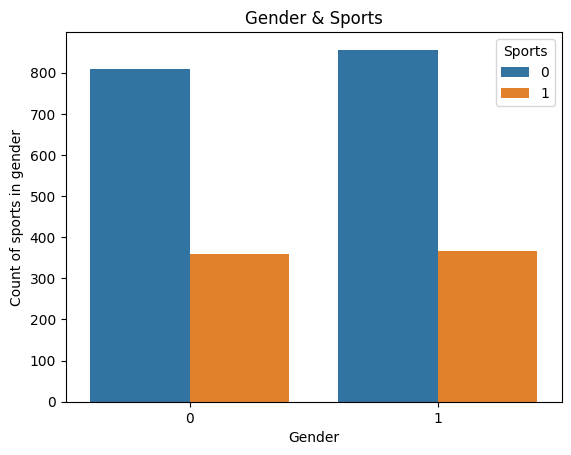

In [59]:
sns.countplot(x="Gender",hue="Sports",data=df)
plt.xlabel("Gender")
plt.ylabel("Count of sports in gender")
plt.title("Gender & Sports")
plt.show()

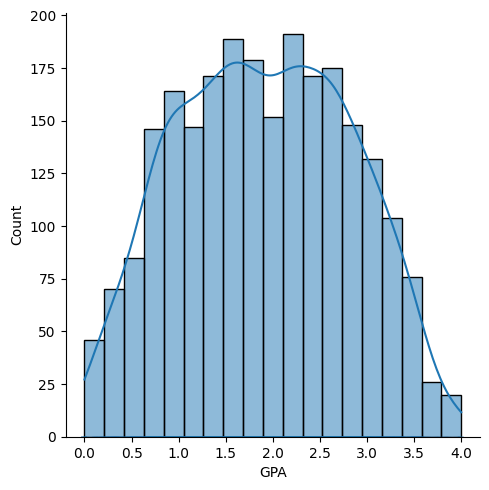

In [60]:
sns.displot(df["GPA"],
            kde=True,
            rug=True,
            rug_kws={"alpha": 0.05, "linewidth": 4, "height": 0.002})
plt.show()
#Bu kod,"df" veri kümesindeki "GPA" sütunundaki verilerin dağılımını yoğunluk eğrisi ve dişlerle görselleştiren bir grafik oluşturur.

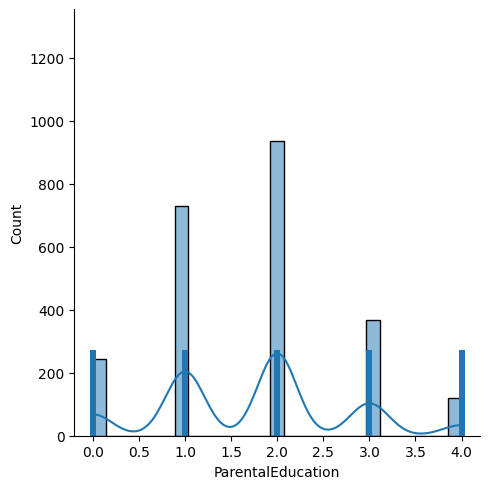

In [61]:
sns.displot(df["ParentalEducation"],
            kde = True,
            rug = True,
            rug_kws={"alpha":0.2,"linewidth":4.0,"height":0.2})
plt.show()
#Bu kod,"df" veri kümesindeki "ParentalEducation" sütunundaki verilerin dağılımını yoğunluk eğrisi ve dişlerle görselleştiren bir grafik oluşturur.

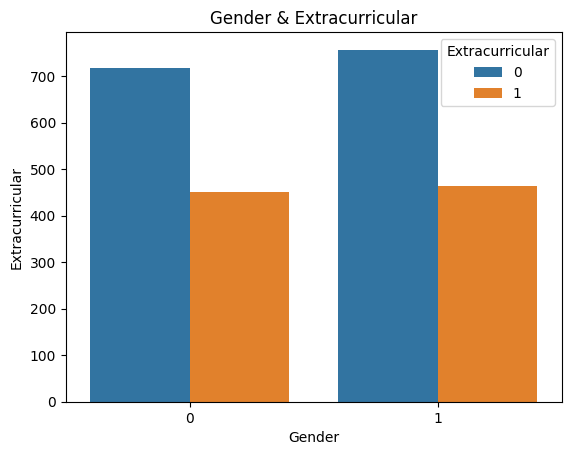

In [62]:
sns.countplot(x="Gender",hue="Extracurricular",data=df)
plt.xlabel("Gender")
plt.ylabel("Extracurricular")
plt.title("Gender & Extracurricular")
plt.show()

Text(0.5, 1.0, 'Gender & Music')

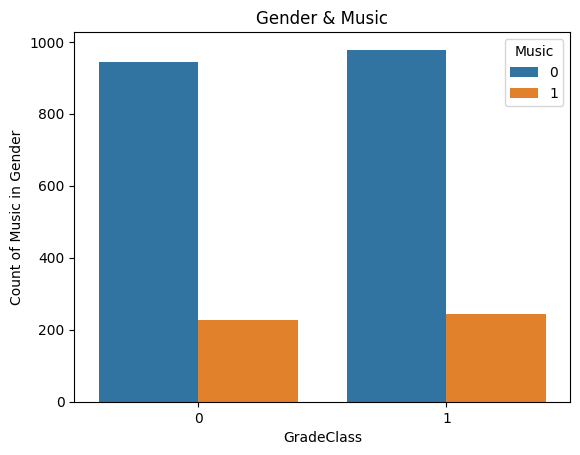

In [63]:
sns.countplot(x='Gender',hue='Music',data=df)
plt.xlabel('GradeClass')
plt.ylabel('Count of Music in Gender')
plt.title('Gender & Music')

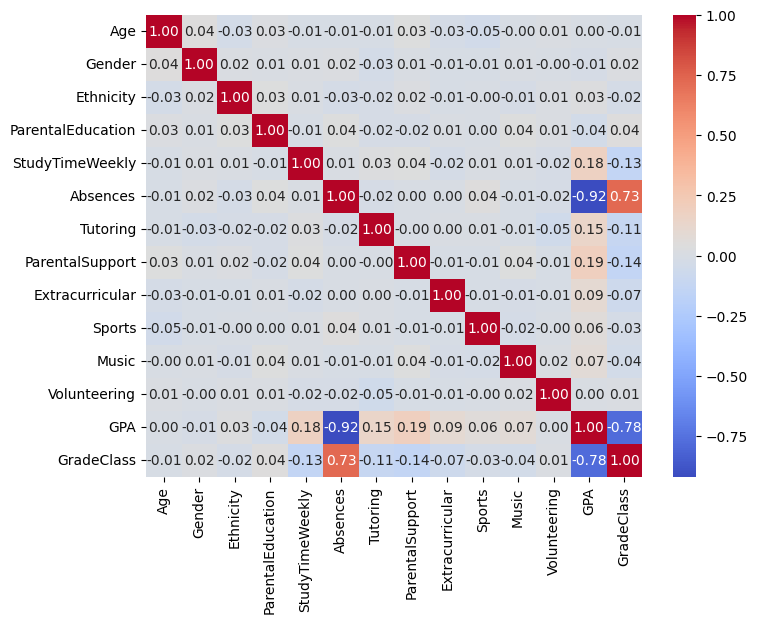

In [64]:
df1 = df.select_dtypes(include=[np.number]) #df1 adlı yeni bir veri çerçevesi oluşturulur ve içerisinde sadece sayısal sütunlar yer alır.
coor = df1.corr() #Korelasyon matrisi elde edilir ve bu matris coor değişkenine atanır.
plt.figure(figsize=(8,6))
sns.heatmap(coor,cmap="coolwarm",annot=True,fmt=".2f") #Heatmap = Isı haritası
plt.show()

In [65]:
#Machine Learning

X = df.drop("GradeClass",axis=1)
y = df["GradeClass"]

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [102]:
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,cv=5,n_jobs=-1,scoring='r2')
grid_search.fit(X_train,y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = best_rf_model.score(X_test, y_test)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2_score}')

Mean Absolute Error: 0.230488135573848
Mean Squared Error: 0.26600394564208835
R^2 Score: 0.8291811423371741


In [71]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(20))

      Actual  Predicted
263      4.0   3.893850
644      4.0   3.908061
2080     4.0   3.934779
1040     4.0   3.763564
227      4.0   3.863409


In [72]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
df["GradeClass"] = LabelEncoder.fit_transform(df["GradeClass"])

In [89]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
#Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [91]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [92]:
reg.score(X_train,y_train)

0.608780757124159

In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [95]:
knn.score(X_test,y_test)

0.6659707724425887

In [96]:
#SVC(Support Vector Machine)
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train,y_train)

print("SVC Doğruluk:",svm.score(X_test,y_test))

SVC Doğruluk: 0.7202505219206681


In [97]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Decision Tree Doğruluk:",dt.score(X_test,y_test))

Decision Tree Doğruluk: 0.8413361169102297
